In [1]:
library(dplyr)
library(ggplot2)
library(vegan)
library(stringr)
safe_colorblind_palette <- c("#88CCEE", "#CC6677", "#DDCC77",
                             "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255",
                             "#661100", "#6699CC", "#888888")
colorBlindBlack8  <- c("#000000", "#E69F00", "#56B4E9", "#009E73", 
                       "#F0E442", "#0072B2", "#D55E00", "#CC79A7")  

O2 <- function(PERMANOVA){
  sumsq <- PERMANOVA$SumOfSqs
  n <- PERMANOVA$Df
  o2 <- (sumsq[1]-n[1]*(sumsq[2]/n[2]))/(sumsq[3] + sumsq[2]/n[2])
  return(o2)
}





Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-6



In [2]:
load("../../results/BatchStudy/Perez_pilot.Rda")
load("../../results/BatchStudy/Perez2022_subgroup_meta.Rda")
load("../../results/BatchStudy/Perez2022_BSdist_pilot.Rda")
meta$sample <- paste0(substr(meta$batch_id,1,nchar(meta$batch_id)-3), ".",meta$Processing_Cohort)

#pilot_mat <- pilot_mat[meta$sample, meta$sample]
gloscope_proportion_mat <- gloscope_proportion_mat[meta$sample, meta$sample]
gloscope_proportion_mat_denovo <- gloscope_proportion_mat_denovo[meta$sample, meta$sample]

In [3]:
head(meta)

,batch_id,Processing_Cohort,disease_state,disease,subgroup,sample
,<chr>,<fct>,<fct>,<fct>,<chr>,<chr>
1,0a1148dc-356f-4dc4-9c32-bf0823257d934.0,4.0,na,normal,sub2,0a1148dc-356f-4dc4-9c32-bf0823257d93.4.0
2,577bce84-8d37-4851-9fb4-53f9467699ba4.0,4.0,managed,systemic lupus erythematosus,sub2,577bce84-8d37-4851-9fb4-53f9467699ba.4.0
3,0f3a21f5-e7b9-4139-93fb-5407dbfde4fc3.0,3.0,flare,systemic lupus erythematosus,3,0f3a21f5-e7b9-4139-93fb-5407dbfde4fc.3.0
4,5e0ed28c-a75a-4ecd-a0c7-49e71264690b4.0,4.0,managed,systemic lupus erythematosus,sub3,5e0ed28c-a75a-4ecd-a0c7-49e71264690b.4.0
5,982d60b4-5677-4e2d-8b58-79503863710d2.0,2.0,managed,systemic lupus erythematosus,2,982d60b4-5677-4e2d-8b58-79503863710d.2.0
6,fc11ebf7-2767-4d92-96f9-a57af8f1be302.0,2.0,managed,systemic lupus erythematosus,2,fc11ebf7-2767-4d92-96f9-a57af8f1be30.2.0


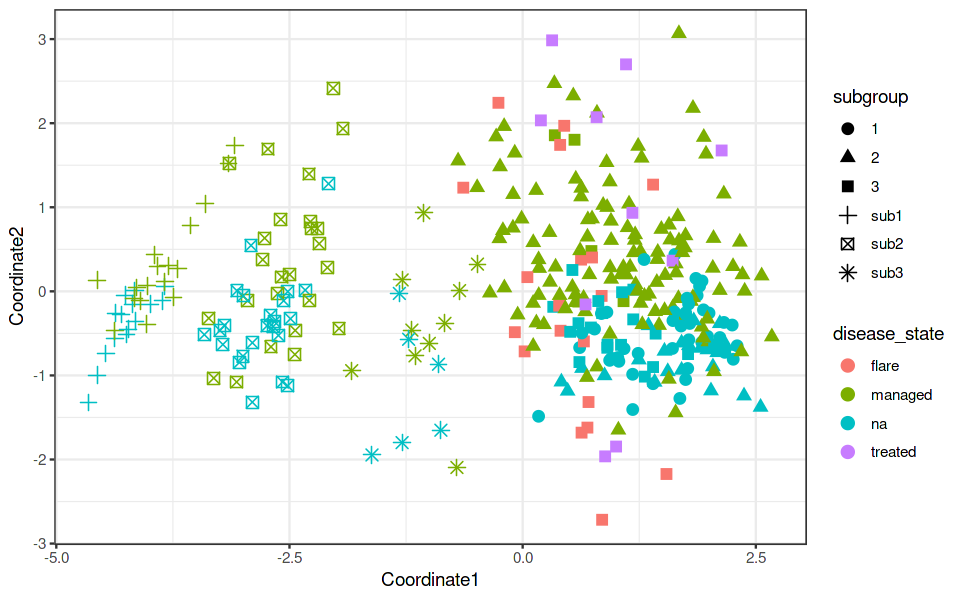

In [4]:

options(repr.plot.width = 8, repr.plot.height = 5)
fit_df <- MASS::isoMDS(gloscope_proportion_mat_denovo, k = 2, trace = FALSE)
    colnames(fit_df$points) <- paste0("Coordinate",seq_len(2))
    mds_df <- cbind(meta, fit_df$points)
ggplot(mds_df, aes(x = Coordinate1, y = Coordinate2)) +
  geom_point(aes(col = disease_state, shape = subgroup), size = 3)+
  theme_bw()

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [OK] | Cores 2/2



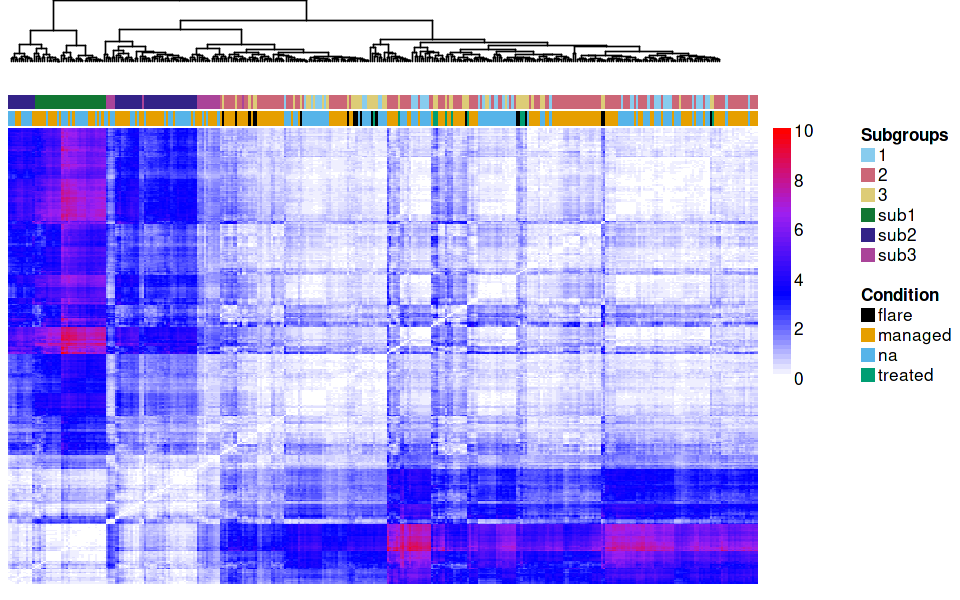

In [5]:
library(NMF)

library(RColorBrewer)
colfunc <- colorRampPalette(c("white", "blue1", "purple","red")) #
aheatmap(gloscope_proportion_mat_denovo, color = colfunc(51),
         annCol = list("Subgroups" = meta$subgroup,
                       "Condition" = meta$disease_state),
         annColors = list('Subgroups' = c(safe_colorblind_palette, colorBlindBlack8),
                          "Condition" = colorBlindBlack8),
         Colv = T, Rowv = FALSE,
         labRow = rep("", nrow(meta)),
         labCol = rep("", nrow(meta)))

In [3]:
pilot_ANS_batch <- anosim(pilot_mat, meta$Processing_Cohort)
pilot_ANS_batch_new <- anosim(pilot_mat, meta$subgroup)
pilot_ANS_Status <- anosim(pilot_mat, meta$disease_state)

#anosim(res, meta_sub$Status)
pilot_ANO_batch <- adonis2(pilot_mat ~meta$Processing_Cohort)
pilot_ANO_batch_new <- adonis2(pilot_mat ~meta$subgroup)
pilot_ANO_Status <- adonis2(pilot_mat ~meta$disease_state)

O2_pilot = O2(pilot_ANO_batch)
O2_pilot_new = O2(pilot_ANO_batch_new)
O2_pilot_status = O2(pilot_ANO_Status)


prop_ANS_batch <- anosim(gloscope_proportion_mat, meta$Processing_Cohort)
prop_ANS_batch_new <- anosim(gloscope_proportion_mat, meta$subgroup)
prop_ANS_Status <- anosim(gloscope_proportion_mat, meta$disease_state)

#anosim(res, meta_sub$Status)
prop_ANO_batch <- adonis2(gloscope_proportion_mat ~meta$Processing_Cohort)
prop_ANO_batch_new <- adonis2(gloscope_proportion_mat ~meta$subgroup)
prop_ANO_Status <- adonis2(gloscope_proportion_mat ~meta$disease_state)

O2_prop = O2(prop_ANO_batch)
O2_prop_new = O2(prop_ANO_batch_new)
O2_prop_status = O2(prop_ANO_Status)

pilot_denovo_ANS_batch <- anosim(pilot_mat_denovo, meta$Processing_Cohort)
pilot_denovo_ANS_batch_new <- anosim(pilot_mat_denovo, meta$subgroup)
pilot_denovo_ANS_Status <- anosim(pilot_mat_denovo, meta$disease_state)

#anosim(res, meta_sub$Status)
pilot_denovo_ANO_batch <- adonis2(pilot_mat_denovo ~meta$Processing_Cohort)
pilot_denovo_ANO_batch_new <- adonis2(pilot_mat_denovo ~meta$subgroup)
pilot_denovo_ANO_Status <- adonis2(pilot_mat_denovo ~meta$disease_state)

O2_pilot_denovo = O2(pilot_denovo_ANO_batch)
O2_pilot_denovo_new = O2(pilot_denovo_ANO_batch_new)
O2_pilot_denovo_status = O2(pilot_denovo_ANO_Status)


prop_denovo_ANS_batch <- anosim(gloscope_proportion_mat_denovo, meta$Processing_Cohort)
prop_denovo_ANS_batch_new <- anosim(gloscope_proportion_mat_denovo, meta$subgroup)
prop_denovo_ANS_Status <- anosim(gloscope_proportion_mat_denovo, meta$disease_state)

#anosim(res, meta_sub$Status)
prop_denovo_ANO_batch <- adonis2(gloscope_proportion_mat_denovo ~meta$Processing_Cohort)
prop_denovo_ANO_batch_new <- adonis2(gloscope_proportion_mat_denovo ~meta$subgroup)
prop_denovo_ANO_Status <- adonis2(gloscope_proportion_mat_denovo ~meta$disease_state)

O2_prop_denovo = O2(prop_denovo_ANO_batch)
O2_prop_denovo_new = O2(prop_denovo_ANO_batch_new)
O2_prop_denovo_status = O2(prop_denovo_ANO_Status)

pilot_compare_O2 <- data.frame(DimReduc = rep("Original", each = 12),
                      Group = rep(c("Batch", "Batch, new","Condition"), 4),
                      Dens =rep(c("PILOT", "Proportion", "PILOT, de novo", "Proportion., de novo"),each = 3),
                      Correction = rep("",12),
                      Value = c(O2_pilot,O2_pilot_new,O2_pilot_status,
                               O2_prop,O2_prop_new,O2_prop_status,
                               O2_pilot_denovo,O2_pilot_denovo_new,O2_pilot_denovo_status,
                               O2_prop_denovo,O2_prop_denovo_new,O2_prop_denovo_status))
pilot_compare_O2$comb = pilot_compare_O2$Dens

pilot_compare_R <- data.frame(DimReduc = rep("Original", each = 12),
                      Group = rep(c("Batch", "Batch, new","Condition"), 4),
                      Dens =rep(c("PILOT", "Proportion", "PILOT, de novo", "Proportion., de novo"),each = 3),
                      Correction = rep("",12),
                      Value = c(pilot_ANS_batch$statistic,pilot_ANS_batch_new$statistic,pilot_ANS_Status$statistic,
                               prop_ANS_batch$statistic,prop_ANS_batch_new$statistic,prop_ANS_Status$statistic,
                               pilot_denovo_ANS_batch$statistic,pilot_denovo_ANS_batch_new$statistic,pilot_denovo_ANS_Status$statistic,
                               prop_denovo_ANS_batch$statistic,prop_denovo_ANS_batch_new$statistic,prop_denovo_ANS_Status$statistic))
pilot_compare_R$comb = pilot_compare_R$Dens


In [4]:
colnames(stat_list) <- paste0(rep(c("PILOT", "Proportion", "PILOT, de novo", "Proportion, de novo", 
                                    "PILOT, new", "Proportion, new","PILOT, de novo, new", "Proportion, de novo, new"),
                                 each = 4),",",
                              c("O2, Batch", "O2, Condition", "R, Batch", "R condition"))


O2_qt <- t(apply(stat_list[,which(str_detect(colnames(stat_list), "O2"))], 2, function(x) quantile(x, c(0.025, 0.975))))
R_qt <- t(apply(stat_list[,which(str_detect(colnames(stat_list), "R"))], 2, function(x) quantile(x, c(0.025, 0.975))))
colnames(R_qt) = colnames(O2_qt) = c("Low.qt", "High.qt")


O2_sd <- apply(stat_list[,which(str_detect(colnames(stat_list), "O2"))], 2, function(x) sd(x))


R_sd <- apply(stat_list[,which(str_detect(colnames(stat_list), "R"))], 2, function(x) sd(x))



In [5]:
O2_qt = O2_qt[c(1,9,2,3,11,4,5,13,6,7,15,8),]
R_qt = R_qt[c(1,9,2,3,11,4,5,13,6,7,15,8),]

O2_sd <- O2_sd[c(1,9,2,3,11,4,5,13,6,7,15,8)]
R_sd <- R_sd[c(1,9,2,3,11,4,5,13,6,7,15,8)]

In [6]:

O2_summary<- data.frame(pilot_compare_O2, data = "Perez2022", sd = O2_sd, O2_qt)
R_summary <- data.frame(pilot_compare_R, data = "Perez2022",  sd = R_sd, R_qt)

In [7]:
load("../../results/BatchStudy/Perez2022_pseu_summary_stat.Rda")

In [8]:
R_tmp_update <- rbind(R_summary, R_tmp)
O2_tmp_update <- rbind(O2_summary, O2_tmp)

In [9]:
O2_tmp_update$comb = factor(O2_tmp_update$comb, levels = unique(O2_tmp_update$comb))
R_tmp_update$comb = factor(R_tmp_update$comb, levels = unique(R_tmp_update$comb))

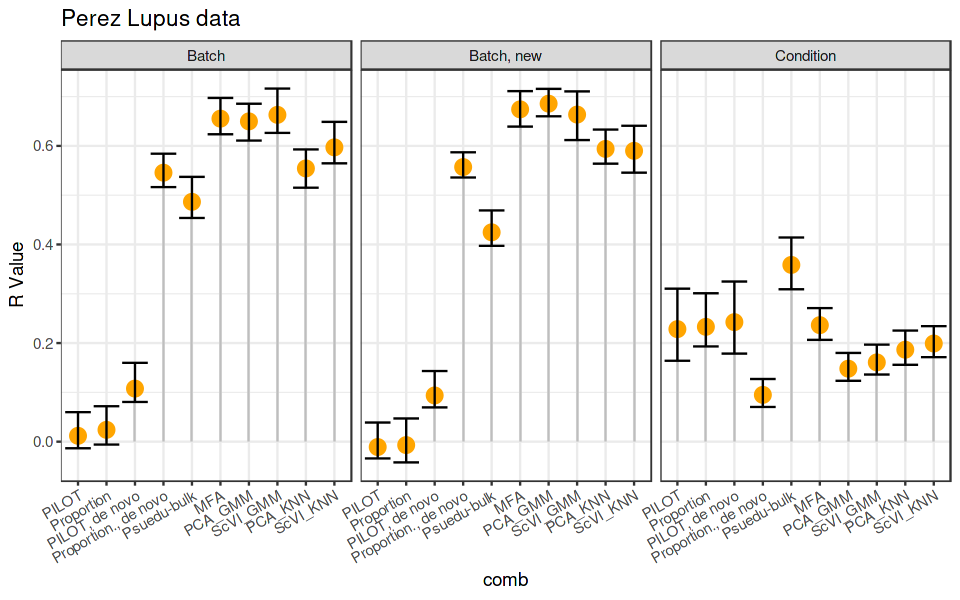

In [10]:
options(repr.plot.width = 8, repr.plot.height = 5) 
ggplot(R_tmp_update, aes(x = comb, y = Value))+
  geom_segment( aes(x=comb, xend=comb, y=0, yend=Value), color="grey")+
 geom_point( color="orange", size=4) +
  theme_bw() +      
  geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
facet_wrap(~Group)+
  ylab("R Value")+
        theme(axis.text.x = element_text(angle = 30, hjust=1))+
  ggtitle("Perez Lupus data")

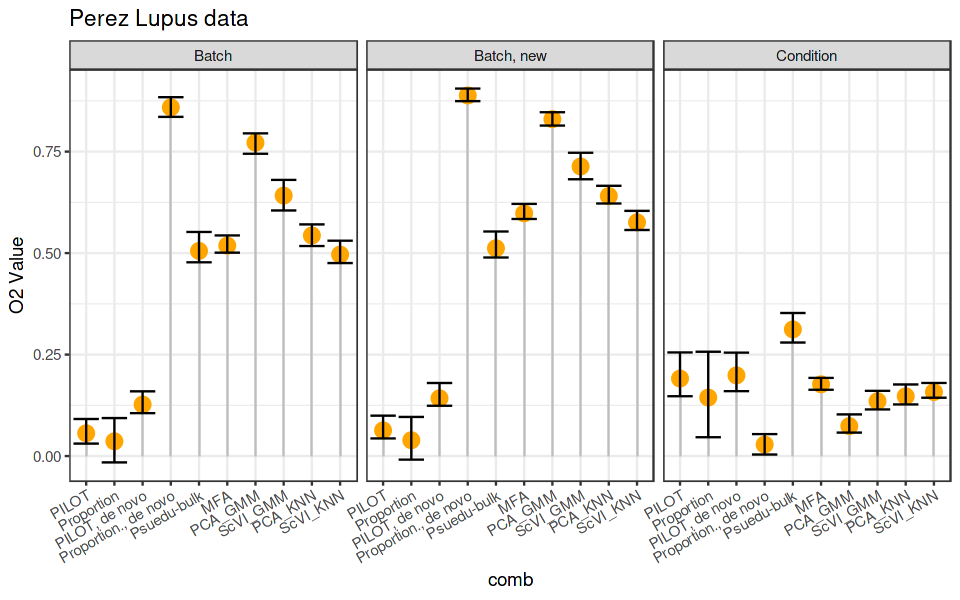

In [11]:
ggplot(O2_tmp_update, aes(x = comb, y = Value))+
  geom_segment( aes(x=comb, xend=comb, y=0, yend=Value), color="grey")+
 geom_point( color="orange", size=4) +
  theme_bw() +      
  geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
facet_wrap(~Group)+
  ylab("O2 Value")+
        theme(axis.text.x = element_text(angle = 30, hjust=1))+
  ggtitle("Perez Lupus data")

In [12]:
save(O2_tmp_update, R_tmp_update, file = "../../results/BatchStudy/Perez2022_methodcompare_RO2.Rda")

In [2]:
load("../../results/BatchStudy/Covid143_pilot.Rda")
load("../../results/COVID_143/meta.Rda")
load("../../results/BatchStudy/COVID143_BSdist_pilot.Rda")
plot_df$Status = as.character(plot_df$Status)
plot_df$sample_id = as.character(plot_df$sample_id)
plot_df$Site = as.character(plot_df$Site)
meta <- unique(plot_df[, c("sample_id", "Status", "Site")])

sub_id <- meta$sample_id[meta$Status %in% c("Covid", "Healthy")]
meta <- meta[meta$sample_id %in% sub_id,]

pilot_mat <- pilot_mat[sub_id, sub_id]
pilot_mat_denovo <- pilot_mat_denovo[sub_id, sub_id]
gloscope_proportion_mat <- gloscope_proportion_mat[sub_id, sub_id]
gloscope_proportion_mat_denovo <- gloscope_proportion_mat_denovo[sub_id, sub_id]


In [3]:
pilot_ANS_batch <- anosim(pilot_mat, meta$Site)
pilot_ANS_Status <- anosim(pilot_mat, meta$Status)

#anosim(res, meta_sub$Status)
pilot_ANO_batch <- adonis2(pilot_mat ~meta$Site)
pilot_ANO_Status <- adonis2(pilot_mat ~meta$Status)

O2_pilot = O2(pilot_ANO_batch)
O2_pilot_status = O2(pilot_ANO_Status)


prop_ANS_batch <- anosim(gloscope_proportion_mat, meta$Site)
prop_ANS_Status <- anosim(gloscope_proportion_mat, meta$Status)

#anosim(res, meta_sub$Status)
prop_ANO_batch <- adonis2(gloscope_proportion_mat ~meta$Site)
prop_ANO_Status <- adonis2(gloscope_proportion_mat ~meta$Status)

O2_prop = O2(prop_ANO_batch)
O2_prop_status = O2(prop_ANO_Status)

pilot_denovo_ANS_batch <- anosim(pilot_mat_denovo, meta$Site)
pilot_denovo_ANS_Status <- anosim(pilot_mat_denovo, meta$Status)

#anosim(res, meta_sub$Status)
pilot_denovo_ANO_batch <- adonis2(pilot_mat_denovo ~meta$Site)
pilot_denovo_ANO_Status <- adonis2(pilot_mat_denovo ~meta$Status)

O2_pilot_denovo = O2(pilot_denovo_ANO_batch)
O2_pilot_denovo_status = O2(pilot_denovo_ANO_Status)


prop_denovo_ANS_batch <- anosim(gloscope_proportion_mat_denovo, meta$Site)
prop_denovo_ANS_Status <- anosim(gloscope_proportion_mat_denovo, meta$Status)

#anosim(res, meta_sub$Status)
prop_denovo_ANO_batch <- adonis2(gloscope_proportion_mat_denovo ~meta$Site)
prop_denovo_ANO_Status <- adonis2(gloscope_proportion_mat_denovo ~meta$Status)

O2_prop_denovo = O2(prop_denovo_ANO_batch)
O2_prop_denovo_status = O2(prop_denovo_ANO_Status)


pilot_compare_O2 <- data.frame(DimReduc = rep("Original", each = 8),
                      Group = rep(c("Batch", "Condition"), 4),
                      Dens =rep(c("PILOT", "Proportion", "PILOT, de novo", "Proportion, de novo"),each = 2),
                      Correction = rep("",8),
                      Value = c(O2_pilot,O2_pilot_status,
                               O2_prop,O2_prop_status,
                               O2_pilot_denovo,O2_pilot_denovo_status,
                               O2_prop_denovo,O2_prop_denovo_status))
pilot_compare_O2$comb = pilot_compare_O2$Dens

pilot_compare_R <- data.frame(DimReduc = rep("Original", each = 8),
                      Group = rep(c("Batch", "Condition"), 4),
                      Dens =rep(c("PILOT", "Proportion", "PILOT, de novo", "Proportion, de novo"),each = 2),
                      Correction = rep("",8),
                      Value = c(pilot_ANS_batch$statistic,pilot_ANS_Status$statistic,
                               prop_ANS_batch$statistic,prop_ANS_Status$statistic,
                               pilot_denovo_ANS_batch$statistic,pilot_denovo_ANS_Status$statistic,
                               prop_denovo_ANS_batch$statistic,prop_denovo_ANS_Status$statistic))
pilot_compare_R$comb = pilot_compare_R$Dens


In [4]:
load("../../results/BatchStudy/COVID143_pseu_summary_stat.Rda")

In [5]:
colnames(stat_list) <- paste0(rep(c("PILOT", "Proportion", "PILOT, de novo", "Proportion, de novo"),
                                 each = 4),",",
                              c("O2, Batch", "O2, Condition", "R, Batch", "R condition"))


O2_qt <- t(apply(stat_list[,which(str_detect(colnames(stat_list), "O2"))], 2, function(x) quantile(x, c(0.025, 0.975))))
R_qt <- t(apply(stat_list[,which(str_detect(colnames(stat_list), "R"))], 2, function(x) quantile(x, c(0.025, 0.975))))
colnames(R_qt) = colnames(O2_qt) = c("Low.qt", "High.qt")


O2_sd <- apply(stat_list[,which(str_detect(colnames(stat_list), "O2"))], 2, function(x) sd(x))


R_sd <- apply(stat_list[,which(str_detect(colnames(stat_list), "R"))], 2, function(x) sd(x))


O2_summary<- data.frame(pilot_compare_O2, data = "COVID143", sd = O2_sd, O2_qt)
R_summary <- data.frame(pilot_compare_R, data = "COVID143",  sd = R_sd, R_qt)
R_tmp_update <- rbind(R_summary, R_tmp)
O2_tmp_update <- rbind(O2_summary, O2_tmp)
O2_tmp_update$comb = factor(O2_tmp_update$comb, levels = unique(O2_tmp_update$comb))
R_tmp_update$comb = factor(R_tmp_update$comb, levels = unique(R_tmp_update$comb))

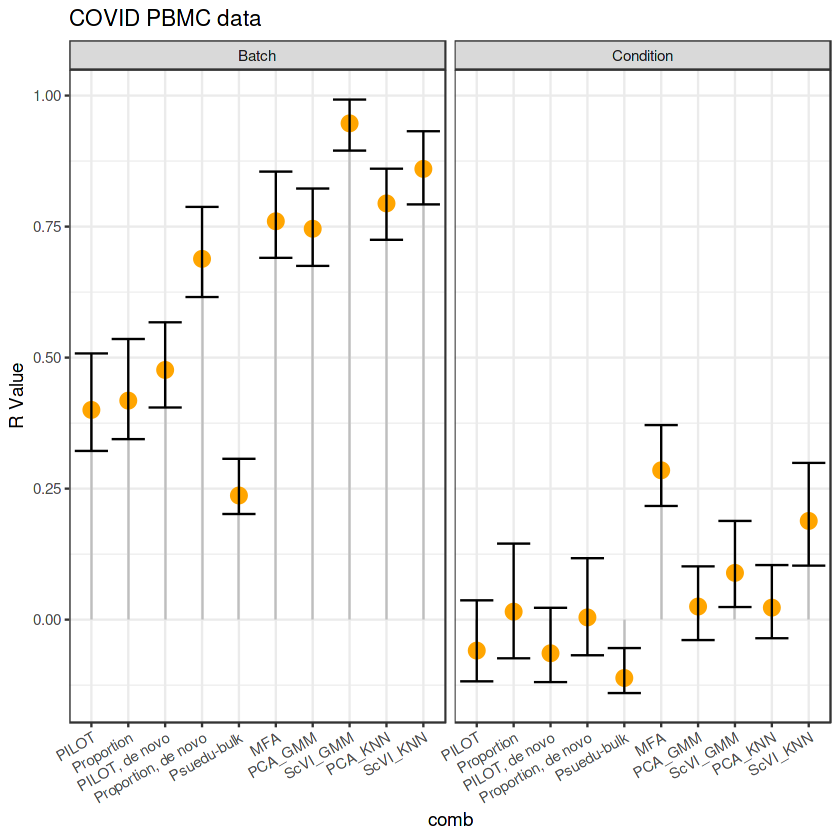

In [6]:
ggplot(R_tmp_update, aes(x = comb, y = Value))+
  geom_segment( aes(x=comb, xend=comb, y=0, yend=Value), color="grey")+
 geom_point( color="orange", size=4) +
  theme_bw() +      
  geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
facet_wrap(~Group)+
  ylab("R Value")+
        theme(axis.text.x = element_text(angle = 30, hjust=1))+
  ggtitle("COVID PBMC data")

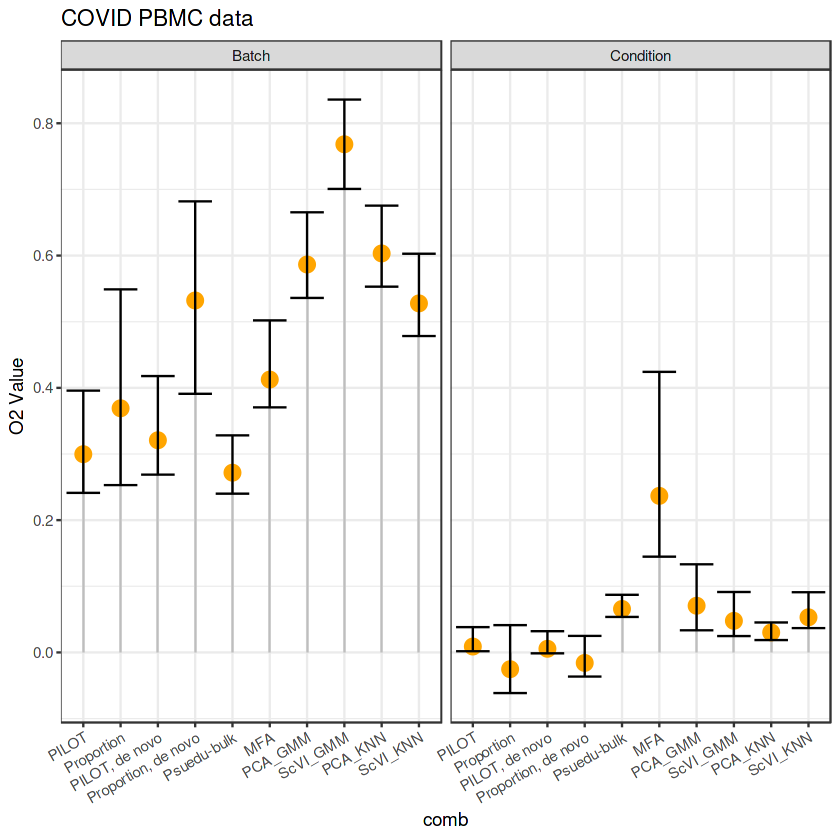

In [7]:
ggplot(O2_tmp_update, aes(x = comb, y = Value))+
  geom_segment( aes(x=comb, xend=comb, y=0, yend=Value), color="grey")+
 geom_point( color="orange", size=4) +
  theme_bw() +      
  geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
facet_wrap(~Group)+
  ylab("O2 Value")+
        theme(axis.text.x = element_text(angle = 30, hjust=1))+
  ggtitle("COVID PBMC data")

In [8]:
save(R_tmp_update,O2_tmp_update, file = "../../results/BatchStudy/COVID143_methodcompare_RO2.Rda")